In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-bvp-diffmats)=
# Differentiation matrices

```{index} finite differences; matrix
```
In {numref}`section-localapprox-finitediffs` we used finite differences to turn a discrete collection of function values into an estimate of the derivative of the function at a point. Just as with differentiation in elementary calculus, we can generalize differences at a point into an operation that maps discretized functions to discretized derivatives.


## Matrices for finite differences

We first discretize the interval $x\in[a,b]$ into equal pieces of length $h=(b-a)/n$, leading to the nodes

$$
x_i=a+i h, \qquad  i=0,\ldots,n.
$$

Note again that our node indexing scheme starts at zero. Our goal is to find a vector $\mathbf{g}$ such that $g_i \approx f'(x_i)$ for $i=0,\ldots,n$. Our first try is the forward difference formula {eq}`forwardFD11`,

$$
g_i = \frac{f_{i+1}-f_i}{h}, \qquad t=0,\ldots,n-1.
$$

However, this leaves $g_n$ undefined, because the formula would refer to the unavailable value $f_{n+1}$. For $g_n$ we could resort to the backward difference

$$
g_n = \frac{f_{n}-f_{n-1}}{h}.
$$

We can summarize the entire set of formulas by defining

$$
\mathbf{f} = 
\begin{bmatrix}
f(x_0) \\[1mm] f(x_1) \\[1mm] \vdots \\[1mm] f(x_{n-1}) \\[1mm] f(x_n)
\end{bmatrix}, \quad
$$

and then the vector equation

:::{math}
:label: diffmat11
\begin{bmatrix}
f'(x_0) \\[1mm] f'(x_1) \\[1mm] \vdots \\[1mm] f'(x_{n-1}) \\[1mm] f'(x_n)
\end{bmatrix}
\approx
\mathbf{D}_x \mathbf{f}, \qquad
\mathbf{D}_x
= \frac{1}{h}
\begin{bmatrix}
-1 & 1 & & & \\[1mm]
& -1 & 1 & & \\[1mm]
& & \ddots & \ddots & \\[1mm]
& & & -1 & 1 \\[1mm]
& & & -1 & 1
\end{bmatrix}.
:::

```{index} ! differentiation matrix
```
Here as elsewhere, elements of $\mathbf{D}_x$ that are not shown are zero. We call $\mathbf{D}_x$ a **differentiation matrix**. Each row of $\mathbf{D}_x$ gives the weights of the finite-difference formula being used at one of the nodes.

```{index} order of accuracy; of a finite-difference formula
```

The differentiation matrix $\mathbf{D}_x$ in {eq}`diffmat11` is not a unique choice. We are free to use whatever finite-difference formulas we like in each row. However, it makes sense to choose rows that are as similar as possible. Using second-order centered differences where possible and second-order one-sided formulas (see {numref}`table-FDforward`) at the boundary points leads to

:::{math}
:label: diffmat12b
\mathbf{D}_x = \frac{1}{h}
\begin{bmatrix}
-\frac{3}{2} & 2    & -\frac{1}{2}   &        &        &  \\[1mm]
-\frac{1}{2} & 0    & \frac{1}{2}    &        &        &  \\[1mm]
& -\frac{1}{2} & 0      & \frac{1}{2}    &        &  \\
&      & \ddots & \ddots & \ddots &  \\
&      &        & -\frac{1}{2}   & 0      & \frac{1}{2} \\[1mm]
&      &        & \frac{1}{2}    & -2     & \frac{3}{2}
\end{bmatrix}.
:::

```{index} banded matrix, sparse matrix
```

The differentiation matrices so far are banded matrices, i.e., all the nonzero values are along diagonals close to the main diagonal.[^sparseconv]

[^sparseconv]: In order to exploit this structure efficiently in Julia, these matrices first need to be constructed as or converted to sparse or tridiagonal form.

## Second derivative

Similarly, we can define differentiation matrices for second derivatives. For example,

:::{math}
:label: diffmat22
\begin{bmatrix}
f''(x_0) \\[1mm] f''(x_1) \\[1mm] f''(x_2) \\[1mm] \vdots \\[1mm] f''(x_{n-1}) \\[1mm] f''(x_n)
\end{bmatrix}
\approx
\frac{1}{h^2}
\begin{bmatrix}
2 & -5 & 4      & -1     &        &     \\[1mm]
1 & -2 & 1      &        &        &    \\[1mm]
& 1  & -2     & 1      &        &    \\[1mm]
&    & \ddots & \ddots & \ddots &    \\[1mm]
&        &        & 1      & -2 & 1 \\[1mm]
&        &     -1  & 4      & -5 & 2
\end{bmatrix}
\begin{bmatrix}
f(x_0) \\[1mm] f(x_1) \\[1mm] f(x_2) \\[1mm] \vdots \\[1mm] f(x_{n-1}) \\[1mm] f(x_n)
\end{bmatrix} = \mathbf{D}_{xx} \mathbf{f}.
:::

We have multiple choices again for $\mathbf{D}_{xx}$, and it need not be the square of any particular $\mathbf{D}_x$. As pointed out in {numref}`section-localapprox-finitediffs`, squaring the first derivative is a valid approach but would place entries in $\mathbf{D}_{xx}$ farther from the diagonal than is necessary.

(function-diffmat2)=
````{proof:function} diffmat2
**Second-order accurate differentiation matrices**
```{code-block} julia1
:lineno-start: 1
"""
    diffmat2(n,xspan)

Compute 2nd-order-accurate differentiation matrices on `n`+1 points
in the interval `xspan`. Returns a vector of nodes and the matrices
for the first and second derivatives.
"""
function diffmat2(n,xspan)
    a,b = xspan
    h = (b-a)/n
    x = [ a + i*h for i in 0:n ]   # nodes

    # Define most of Dₓ by its diagonals.
    dp = fill(0.5/h,n)        # superdiagonal
    dm = fill(-0.5/h,n)       # subdiagonal
    Dₓ = diagm(-1=>dm,1=>dp)

    # Fix first and last rows.
    Dₓ[1,1:3] = [-1.5,2,-0.5]/h
    Dₓ[n+1,n-1:n+1] = [0.5,-2,1.5]/h

    # Define most of Dₓₓ by its diagonals.
    d0 =  fill(-2/h^2,n+1)    # main diagonal
    dp =  ones(n)/h^2         # super- and subdiagonal
    Dₓₓ = diagm(-1=>dp,0=>d0,1=>dp)

    # Fix first and last rows.
    Dₓₓ[1,1:4] = [2,-5,4,-1]/h^2
    Dₓₓ[n+1,n-2:n+1] = [-1,4,-5,2]/h^2

    return x,Dₓ,Dₓₓ
end
```
````

Together the matrices {eq}`diffmat12b` and {eq}`diffmat22` give second-order approximations of the first and second derivatives at all nodes. These matrices, as well as the nodes $x_0,\ldots,x_n$, are returned by {numref}`Function {number} <function-diffmat2>`.

(demo-diffmats-2nd)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We test first-order and second-order differentiation matrices for the function $x + \exp(\sin 4x)$ over $[-1,1]$.

In [2]:
f = x -> x + exp(sin(4*x));

For reference, here are the exact first and second derivatives.

In [3]:
dfdx = x -> 1 + 4*exp(sin(4*x)) * cos(4*x);
d2fdx2 = x -> 4*exp(sin(4*x)) * (4*cos(4*x)^2-4*sin(4*x));

We discretize on equally spaced nodes and evaluate $f$ at the nodes.

In [4]:
t,Dₓ,Dₓₓ = FNC.diffmat2(18,[-1,1])
y = f.(t);

Then the first two derivatives of $f$ each require one matrix-vector multiplication.

In [5]:
yₓ = Dₓ*y;
yₓₓ = Dₓₓ*y;

The results show poor accuracy for this small value of $n$.

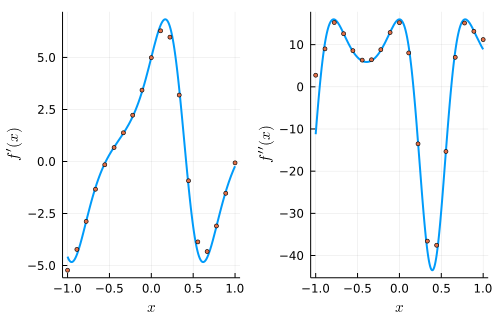

In [6]:
plot(dfdx,-1,1,layout=2,xaxis=(L"x"),yaxis=(L"f'(x)"))
scatter!(t, yₓ,subplot=1)
plot!(d2fdx2,-1,1,subplot=2,xaxis=(L"x"),yaxis=(L"f''(x)"))
scatter!(t, yₓₓ,subplot=2)

An convergence experiment confirms the order of accuracy. Because we expect an algebraic convergence rate, we use a log-log plot of the errors.

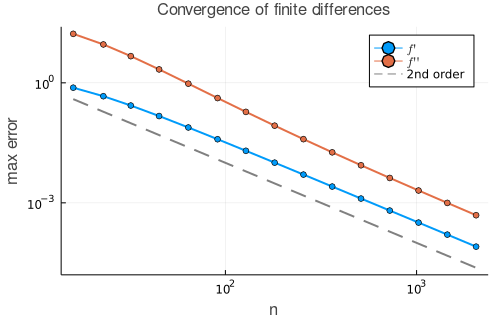

In [7]:
n = @. round(Int,2^(4:.5:11) )
err1 = zeros(size(n))
err2 = zeros(size(n))
for (k,n) in enumerate(n)
    t,Dₓ,Dₓₓ = FNC.diffmat2(n,[-1,1])
    y = f.(t)
    err1[k] = norm( dfdx.(t) - Dₓ*y, Inf )
    err2[k] = norm( d2fdx2.(t) - Dₓₓ*y, Inf )
end
plot(n,[err1 err2],m=:o,label=[L"f'" L"f''"])
plot!(n,10*10*n.^(-2),l=(:dash,:gray),label="2nd order",
    xaxis=(:log10,"n"), yaxis=(:log10,"max error"),
    title="Convergence of finite differences")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Spectral differentiation

Recall that finite-difference formulas are derived in three steps:

1. Choose a node index set $S$ near node $i$.
2. Interpolate with a polynomial using the nodes in $S$.
3. Differentiate the interpolant and evaluate at node $i$.

```{index} Chebyshev points; second kind
```
We can modify this process by using a global interpolant, either polynomial or trigonometric, as in [Chapter 9](../globalapprox/overview). Rather than choosing a different index set for each node, we use all of the nodes each time. 

In a nonperiodic setting we use Chebyshev second-kind points for stability:

$$
x_k = -\cos\left(\frac{k \pi}{n}\right), \qquad k=0,\ldots,n;
$$

```{index} differentiation matrix
```
then the resulting **Chebyshev differentiation matrix** has entries 

:::{math}
  :label: chebdiffmat
  \begin{gathered}
    D_{00} = \dfrac{2n^2+1}{6}, \qquad D_{n n} = -\dfrac{2n^2+1}{6}, \\
    D_{ij} =
    \begin{cases}
      -\dfrac{x_i}{2(1-x_i^2)}, & i=j, \\[4mm]
      \dfrac{c_i}{c_j}\, \dfrac{(-1)^{i+j}}{x_i-x_j}, & i\neq j,
    \end{cases}
  \end{gathered}
:::

where $c_0=c_n=2$ and $c_i=1$ for $i=1,\ldots,n-1$. Note that this matrix is dense. The simplest way to compute a second derivative is by squaring $\mathbf{D}_x$, as there is no longer any concern about the bandwidth of the result.

{numref}`Function {number} <function-diffcheb>` returns these two matrices. The function uses a change of variable to transplant the standard $[-1,1]$ for Chebyshev nodes to any $[a,b]$. It also takes a different approach to computing the diagonal elements of $\mathbf{D}_x$ than the formulas in {eq}`chebdiffmat` (see {ref}`Exercise 5 <problem-diffmats-negsumtrick>`).

(function-diffcheb)=
````{proof:function} diffcheb
**Chebyshev differentiation matrices**
```{code-block} julia1
:lineno-start: 1
"""
    diffcheb(n,xspan)

Compute Chebyshev differentiation matrices on `n`+1 points in the
interval `xspan`. Returns a vector of nodes and the matrices for the
first and second derivatives.
"""
function diffcheb(n,xspan)
    x = [ -cos( k*π/n ) for k in 0:n ]    # nodes in [-1,1]
    
    # Off-diagonal entries.
    c = [2; ones(n-1); 2];    # endpoint factors
    dij = (i,j) -> (-1)^(i+j)*c[i+1]/(c[j+1]*(x[i+1]-x[j+1]))
    Dₓ = [ dij(i,j) for i in 0:n, j in 0:n ]

    # Diagonal entries.
    Dₓ[isinf.(Dₓ)] .= 0         # fix divisions by zero on diagonal
    s = sum(Dₓ,dims=2)
    Dₓ -= diagm(s[:,1])         # "negative sum trick"

    # Transplant to [a,b].
    a,b = xspan
    x = @. a + (b-a)*(x+1)/2
    Dₓ = 2*Dₓ/(b-a)             # chain rule

    # Second derivative.
    Dₓₓ = Dₓ^2
    return x,Dₓ,Dₓₓ
end
```
````

(demo-diffmats-cheb)=

```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Here is a $4\times 4$ Chebyshev differentiation matrix.

In [8]:
t,Dₓ = FNC.diffcheb(3,[-1,1])
Dₓ

4×4 Matrix{Float64}:
 -3.16667    4.0       -1.33333    0.5
 -1.0        0.333333   1.0       -0.333333
  0.333333  -1.0       -0.333333   1.0
 -0.5        1.33333   -4.0        3.16667

We again test the convergence rate.

In [9]:
f = x -> x + exp(sin(4*x));
dfdx = x -> 1 + 4*exp(sin(4*x))*cos(4*x);
d2fdx2 = x -> 4*exp(sin(4*x))*(4*cos(4*x)^2-4*sin(4*x));

In [10]:
n = 5:5:70
err1 = zeros(size(n))
err2 = zeros(size(n))
for (k,n) in enumerate(n)
    t,Dₓ,Dₓₓ = FNC.diffcheb(n,[-1,1])
    y = f.(t)
    err1[k] = norm( dfdx.(t) - Dₓ*y, Inf )
    err2[k] = norm( d2fdx2.(t) - Dₓₓ*y, Inf )
end

Since we expect a spectral convergence rate, we use a semi-log plot for the error.

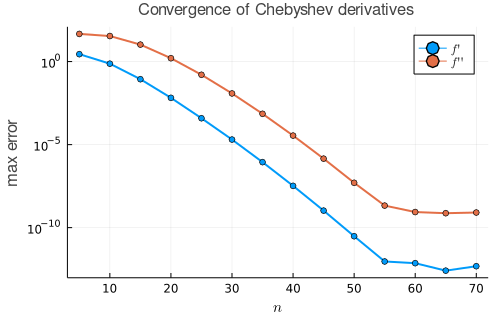

In [11]:
plot(n,[err1 err2],m=:o,label=[L"f'" L"f''"],
    xaxis=(L"n"), yaxis=(:log10,"max error"),
    title="Convergence of Chebyshev derivatives")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```


According to {numref}`Theorem %s <theorem-spectral>`, the convergence of polynomial interpolation to $f$ using Chebyshev nodes is spectral if $f$ is analytic (at least having infinitely many derivatives) on the interval. The derivatives of $f$ are also approximated with spectral accuracy.

## Exercises

1. 
    **(a)** ✍ Calculate $\mathbf{D}_x^2$ using {eq}`diffmat11` to define $\mathbf{D}_x$.
    
    **(b)** ⌨ Repeat the experiment of {numref}`Demo %s <demo-diffmats-2nd>`, but using this version of $\mathbf{D}_x^2$ to estimate $f''$. What is the apparent order of accuracy in $f''$?

2. 
    **(a)** ✍ Find the derivative of $f(x) =\operatorname{sign}(x)x^2$ on the interval $[-1,1]$. (If this gives you trouble, use an equivalent piecewise definition of $f$.) What is special about this function at $x=0$? 

    **(b)** ⌨ Adapt {numref}`Demo %s <demo-diffmats-2nd>` to operate on the function from part (a), computing only the first derivative. What is the observed order of accuracy?
  
    **(c)** ✍ Show that for even values of $n$, there is only one node at which the error for computing $f'$ in part (b) is nonzero.

3. ⌨ To get a fourth-order accurate version of $\mathbf{D}_x$, five points per row are needed, including two special rows at each boundary. For a fourth-order $\mathbf{D}_{xx}$, five symmetric points per row are needed for interior rows and six points are needed for the rows near a boundary.

    **(a)** Modify {numref}`Function {number} <function-diffmat2>` to a function `diffmat4`, which outputs fourth-order accurate differentiation matrices. You may want to use {numref}`Function {number} <function-fdweights>`.
    
    **(b)** Repeat the experiment of {numref}`Demo %s <demo-diffmats-2nd>` using `diffmat4` in place of {numref}`Function {number} <function-diffmat2>`, and compare observed errors to fourth-order accuracy.

4. ✍ Explain in detail how lines 23-24 in {numref}`Function {number} <function-diffcheb>` correctly change the interval from $[-1,1]$ to $[a,b]$.

    (problem-diffmats-negsumtrick)=
5. 
    **(a)** ✍ What is the derivative of a constant function?
    
    **(b)** ✍ Explain why for any reasonable differentiation matrix $\mathbf{D}$, we should find $\displaystyle \sum_{j=0}^nD_{ij}=0$ for all $i$.
    
    **(c)** ✍ What does this have to do with {numref}`Function {number} <function-diffcheb>`? Refer to specific line(s) in the function for your answer.

6. Define the $(n+1)\times (n+1)$ matrix $\mathbf{T} = \displaystyle \begin{bmatrix}
    1 & & & \\ 1 & 1 & & \\ \vdots & & \ddots & \\ 1 & 1 & \cdots & 1
    \end{bmatrix}$.

    **(a)** ✍ Write out $\mathbf{T}\mathbf{u}$ for a generic vector $\mathbf{u}$ (start with a zero index). How is this like integration?
    
    **(b)** ✍ Find the inverse of $\mathbf{T}$ for any $n$.  (You can use Julia to find the pattern, but show that the result is correct in general.) What does this have to do with the inverse of integration?